In [1]:
import numpy as np #для матричных вычислений

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 
from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
plt.style.use('seaborn') #стиль отрисовки seaborn
%matplotlib inline

In [2]:
water_data = pd.read_csv('../data/water_potability.csv')
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
display(water_data[water_data.isna().any(axis=1)])

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
water_data.groupby('Potability')['Sulfate'].median()

Potability
0    333.389426
1    331.838167
Name: Sulfate, dtype: float64

In [5]:
display(water_data.isnull().mean()*100)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [6]:
water_data.fillna({'ph': water_data.groupby('Potability')['ph'].transform('median'),
                   'Sulfate': water_data.groupby('Potability')['Sulfate'].transform('median'),
                   'Trihalomethanes':  water_data.groupby('Potability')['Trihalomethanes'].transform('median'),
    }, inplace=True)
display(water_data.isnull().mean()*100)

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

In [7]:
X = water_data.drop('Potability', axis=1)
y = water_data['Potability']

In [8]:
X.shape

(3276, 9)

# Двухкомпонентный метод

In [9]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
print('Train shape: {}'.format(X_train.shape))
print('Valid shape: {}'.format(X_valid.shape))

Train shape: (2620, 9)
Valid shape: (656, 9)


In [11]:
dt_model = tree.DecisionTreeClassifier(max_depth=7, criterion='entropy', random_state=42,min_samples_leaf=5)
dt_model.fit(X_train, y_train)
dt_train_preds = dt_model.predict(X_train)
dt_valid_preds = dt_model.predict(X_valid)
print('Train hold-out accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, dt_train_preds)))
print(f'accuracy score on decision tree: {metrics.accuracy_score(y_valid, dt_valid_preds):.2f}')

Train hold-out accuracy: 0.82
accuracy score on decision tree: 0.77


# Трехкомпонентный метод

In [12]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = model_selection.train_test_split(X_valid, y_valid, test_size=0.5, random_state=42)

In [13]:
print('Train shape: {}'.format(X_train.shape))
print('Valid shape: {}'.format(X_valid.shape))
print('Test shape: {}'.format(X_test.shape))


Train shape: (2620, 9)
Valid shape: (328, 9)
Test shape: (328, 9)


# Кросс валидация

In [14]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел  
)
#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
#Создаём список для хранения тренировочных и валидационных метрик
train_metrics = []
val_metrics = []
#Организуем цикл для кросс-валидации (используем весь набор данных)
#train_index — индексы тренировочной выборки
#valid_index — индексы валидационной выборки
for train_index, valid_index in kf.split(X, y): 
    #Создаём тренировочную и валидационную выборку, обращаясь по текущим индексам
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_valid, y_valid = X.iloc[valid_index], y.iloc[valid_index]
    #Обучаем случайный лес на тренировочной выборке
    model.fit(X_train, y_train)
    #Делаем предсказание для каждой из выборок
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    #Рассчитываем метрику и заносим её в список
    train_metrics.append(metrics.accuracy_score(y_train, y_train_pred))
    val_metrics.append(metrics.accuracy_score(y_valid, y_valid_pred))

In [15]:
print(train_metrics)
print(val_metrics)

[0.8034351145038168, 0.8168637924456315, 0.8027470431133156, 0.8267836703548264, 0.8157191911484166]
[0.7957317073170732, 0.7053435114503817, 0.7358778625954199, 0.7282442748091603, 0.732824427480916]


In [16]:
print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(train_metrics)))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(val_metrics)))

Train k-fold mean accuracy: 0.81
Valid k-fold mean accuracy: 0.74


## кросс валидация с cross_validate

In [17]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел  
)
 
#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=model, #модель
    X=X, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring='accuracy', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
cv_metrics_mean = {cv_key: np.mean(cv_metrics[cv_key]) for cv_key in cv_metrics.keys()}
cv_metrics_mean

{'fit_time': 0.01676969528198242,
 'score_time': 0.002309846878051758,
 'test_score': 0.7396043567305902,
 'train_score': 0.8131097623132014}

In [18]:
print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean accuracy: 0.81
Valid k-fold mean accuracy: 0.74


# leave one out

In [19]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел  
)
 
#Создаём кросс-валидатор LeaveOneOut
loo = model_selection.LeaveOneOut()

# cv_metrics = {'train_score': [],
#               'test_score': []}

# АЛЬТЕРНАТИВА 
# for train_ind, test_ind in loo.split(X[:500], y[:500]):
#     X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
#     X_test, y_test = X.iloc[test_ind], y.iloc[test_ind]
#     model.fit(X_train, y_train)
#     train_preds = model.predict(X_train)
#     test_preds = model.predict(X_test)
#     cv_metrics['train_score'].append(metrics.accuracy_score(y_train, train_preds))
#     cv_metrics['test_score'].append(metrics.accuracy_score(y_test, test_preds))

# Считаем метрики на кросс-валидации leave-one-out
cv_metrics = model_selection.cross_validate( 
    estimator=model, #модель
    X=X, #матрица наблюдений X # но вообще, это затратно
    y=y, #вектор ответов y
    cv=loo, #кросс-валидатор
    scoring='accuracy', #метрика
    return_train_score=True, #подсчёт метрики на тренировочных фолдах,
    n_jobs=-1 # распараллеливание
)
 
print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['test_score'])))
 
## Train k-fold mean accuracy: 0.95
## Valid k-fold mean accuracy: 0.90

Train k-fold mean accuracy: 0.81
Valid k-fold mean accuracy: 0.76


# Stratify and stratKfold


In [20]:
skf = model_selection.StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for train_index, valid_index in skf.split(X, y): 
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_valid, y_valid = X.iloc[valid_index], y.iloc[valid_index]
    print('Train:\n', y_train.value_counts(normalize=True), sep='')
    print('Valid:\n', y_valid.value_counts(normalize=True), sep='')
    print('-'*40)

Train:
0    0.60989
1    0.39011
Name: Potability, dtype: float64
Valid:
0    0.60989
1    0.39011
Name: Potability, dtype: float64
----------------------------------------
Train:
0    0.60989
1    0.39011
Name: Potability, dtype: float64
Valid:
0    0.60989
1    0.39011
Name: Potability, dtype: float64
----------------------------------------
Train:
0    0.60989
1    0.39011
Name: Potability, dtype: float64
Valid:
0    0.60989
1    0.39011
Name: Potability, dtype: float64
----------------------------------------


# some practice

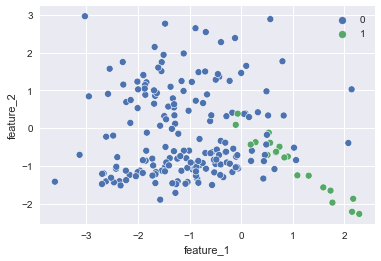

In [21]:
from sklearn import datasets
X, y = datasets.make_classification(
    n_samples=200, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    weights=[1, 0.2], #пропорции классов
    random_state=40 #генератор случайных чисел
)
X_try = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y_try = pd.Series(y)
sns.scatterplot(x=X_try['feature_1'], y=X_try['feature_2'], hue=y);

In [22]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_try, y_try, stratify=y_try, test_size=0.2, random_state=42)
print(y_train.value_counts(normalize=True))
y_valid.value_counts(normalize=True)


0    0.9
1    0.1
dtype: float64


0    0.9
1    0.1
dtype: float64

<AxesSubplot:xlabel='feature_1', ylabel='feature_2'>

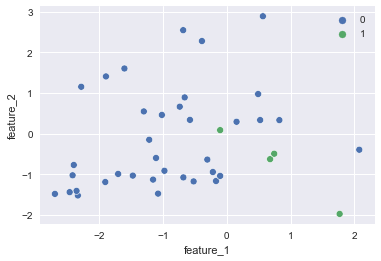

In [23]:
sns.scatterplot(x=X_valid['feature_1'], y=X_valid['feature_2'], hue=y_valid)

In [24]:
log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train, y_train)
y_valid_preds_try = log_reg.predict(X_valid)
print(metrics.classification_report(y_valid, y_valid_preds_try))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.50      0.25      0.33         4

    accuracy                           0.90        40
   macro avg       0.71      0.61      0.64        40
weighted avg       0.88      0.90      0.88        40



c:\Users\mblyz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


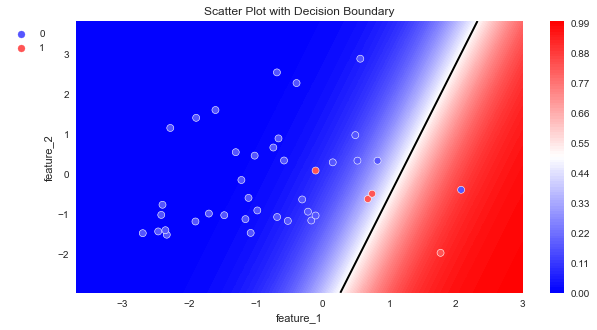

In [25]:
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))
plot_probabilities_2d(X_valid, y_valid, log_reg)

# metric chose

In [26]:
dt_model = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, criterion='entropy', random_state=42)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X,y, stratify=y, test_size=0.2, random_state=42)
dt_model.fit(X_train, y_train)
y_valid_preds = dt_model.predict(X_valid)
print(metrics.classification_report(y_valid, y_valid_preds))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.50      0.50      0.50         4

    accuracy                           0.90        40
   macro avg       0.72      0.72      0.72        40
weighted avg       0.90      0.90      0.90        40



# log_leg with balanced weight

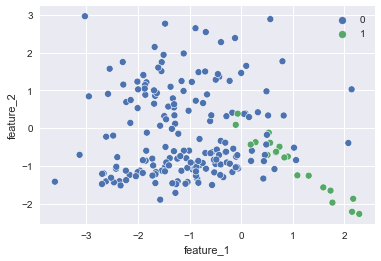

In [27]:
X, y = datasets.make_classification(
    n_samples=200, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    weights=[1, 0.2], #пропорции классов
    random_state=40 #генератор случайных чисел
)
X_try = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y_try = pd.Series(y)
sns.scatterplot(x=X_try['feature_1'], y=X_try['feature_2'], hue=y);

In [28]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_try, y_try, stratify=y_try, test_size=0.2, random_state=42)
print(y_train.value_counts(normalize=True))
y_valid.value_counts(normalize=True)


0    0.9
1    0.1
dtype: float64


0    0.9
1    0.1
dtype: float64

In [29]:
balanced_log_reg = linear_model.LogisticRegression(
    class_weight='balanced'
)
balanced_log_reg.fit(X_train, y_train)
y_balanced_pred = balanced_log_reg.predict(X_valid)
print(metrics.classification_report(y_valid, y_balanced_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90        36
           1       0.33      0.75      0.46         4

    accuracy                           0.82        40
   macro avg       0.65      0.79      0.68        40
weighted avg       0.90      0.82      0.85        40



c:\Users\mblyz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


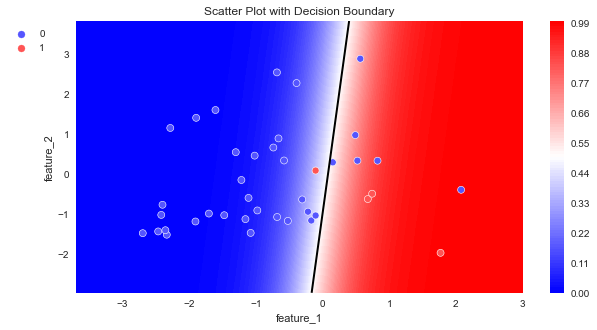

In [30]:
plot_probabilities_2d(X_valid, y_valid, balanced_log_reg)

# PR кривая и cross_val_predict


In [31]:
X = water_data.drop('Potability', axis=1)
y = water_data['Potability']

In [32]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел 
)
#Обучаем модель
model.fit(X_train, y_train)
#Создаём кросс-валидатор k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Делаем предсказание вероятностей на кросс-валидации
y_cv_proba_pred = model_selection.cross_val_predict(model, X_train, y_train, cv=skf, method='predict_proba')
#Выделяем столбец с вероятностями для класса 1 
y_cv_proba_pred = y_cv_proba_pred[:, 1]

In [34]:
precision, recall, thresholds = metrics.precision_recall_curve(y_train, y_cv_proba_pred)
print('Thresholds:', thresholds[:5])
print('Precision scores:', precision[:5])
print('Recall scores:',recall[:5])

Thresholds: [0.         0.07142857 0.08333333 0.08695652 0.09859155]
Precision scores: [0.39465649 0.5101626  0.51068159 0.51095262 0.51096379]
Recall scores: [1.         0.97098646 0.97098646 0.97001934 0.96905222]


c:\Users\mblyz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


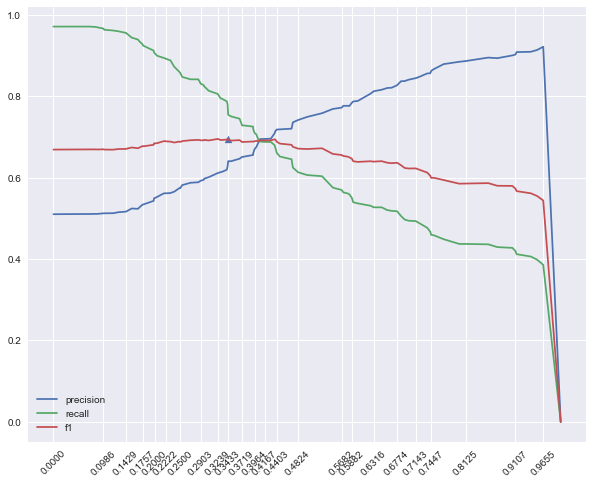

In [35]:
precision_score = []
recall_score = []
f1_score = []
for threshold in thresholds:
    y_pred_train = (y_cv_proba_pred > threshold).astype('int')
    precision_score.append(metrics.precision_score(y_train, y_pred_train))
    recall_score.append(metrics.recall_score(y_train, y_pred_train))
    f1_score.append(metrics.f1_score(y_train, y_pred_train))
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(thresholds, precision_score, label='precision')
ax.plot(thresholds, recall_score, label='recall')
ax.plot(thresholds, f1_score, label='f1')
idmax = np.argmax(f1_score)
ax.scatter(thresholds[idmax], f1_score[idmax], marker='^')
ax.xaxis.set_ticks(thresholds[::4])
ax.xaxis.set_tick_params(rotation=45)
ax.legend()

Best threshold = 0.34, F1-Score = 0.70, pres=0.63, recall=0.78


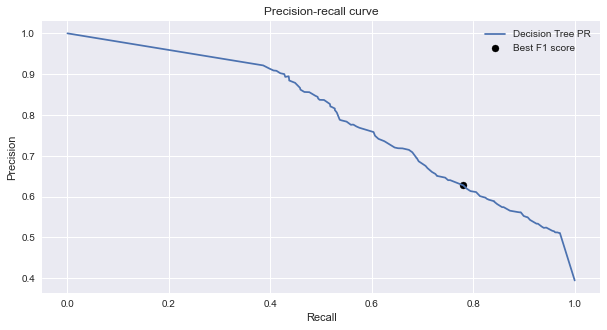

In [36]:
#Вычисляем F1-score при различных threshold
f1_scores = (2 * precision * recall) / (precision + recall)
#Определяем индекс максимума
idx = np.argmax(f1_scores)
print('Best threshold = {:.2f}, F1-Score = {:.2f}, pres={:.2f}, recall={:.2f}'.format(thresholds[idx], f1_scores[idx],
                                                                                      precision[idx], recall[idx]))
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
#Строим линейный график зависимости precision от recall
ax.plot(recall, precision, label='Decision Tree PR')
#Отмечаем точку максимума F1
ax.scatter(recall[idx], precision[idx], marker='o', color='black', label='Best F1 score')
#Даём графику название и подписываем оси
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
#Отображаем легенду
ax.legend();

In [37]:
y_valid_pred_proba = pd.Series(model.predict_proba(X_valid)[:,1])
y_valid_pred = y_valid_pred_proba.apply(lambda x: 1 if x > 0.34 else 0)
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.88      0.65      0.74       412
           1       0.59      0.84      0.69       244

    accuracy                           0.72       656
   macro avg       0.73      0.74      0.72       656
weighted avg       0.77      0.72      0.72       656



In [38]:
print('PR AUC: {:.2f}'.format(metrics.auc(recall, precision)))
# PR AUC: 0.79

PR AUC: 0.80


# Sampling

In [39]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train)
print('Train shape before oversampling:', X_train.shape) 
print('Class balance before oversampling: \n', y_train.value_counts(), sep='')
print('-'*40)
print('Train shape after oversampling:', X_train_s.shape)
print('Class balance after oversampling: \n', y_train_s.value_counts(), sep='')

Train shape before oversampling: (2620, 9)
Class balance before oversampling: 
0    1586
1    1034
Name: Potability, dtype: int64
----------------------------------------
Train shape after oversampling: (3172, 9)
Class balance after oversampling: 
0    1586
1    1586
Name: Potability, dtype: int64


In [40]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42, #генератор случайных чисел
)
#Обучаем модель на тренировочной выборке (с сэмплированием)
model.fit(X_train_s, y_train_s)
#Делаем предсказание для каждой из выборок
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
#Выводим значения метрик    
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       412
           1       0.66      0.68      0.67       244

    accuracy                           0.75       656
   macro avg       0.74      0.74      0.74       656
weighted avg       0.75      0.75      0.75       656



In [43]:
X, y = datasets.make_classification(
    n_samples=200, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    weights=[1, 0.2], #пропорции классов
    random_state=40 #генератор случайных чисел
)
X_try = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y_try = pd.Series(y)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_try, y_try, stratify=y_try, test_size=0.2, random_state=42)


              precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       0.43      0.75      0.55         4

    accuracy                           0.88        40
   macro avg       0.70      0.82      0.74        40
weighted avg       0.92      0.88      0.89        40



c:\Users\mblyz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


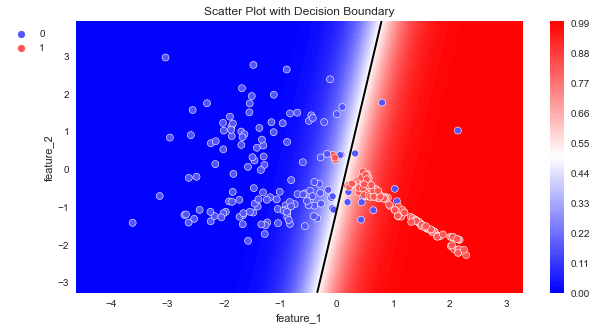

In [48]:
sm_try = SMOTE(random_state=42)
X_train_try_s, y_train_try_s = sm_try.fit_resample(X_train, y_train)
lg_model = linear_model.LogisticRegression()
lg_model.fit(X_train_try_s, y_train_try_s)
preds = lg_model.predict(X_valid)
print(metrics.classification_report(y_valid, preds))
plot_probabilities_2d(X_train_try_s, y_train_try_s, lg_model)